In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm

from src.data import Cataract101

In [2]:
N = 16
T = 3
ds = Cataract101(root="/local/scratch/cataract-101-processed/", n_seq_frames=T, dt=T, split="Training", phases=None)
dl = DataLoader(ds, batch_size=N, num_workers=1, shuffle=False)

In [3]:
len(ds)

56513

In [4]:
sample = next(iter(dl))
img_seq = sample['img_seq']
case_ids = sample['case_id']
frame_nrs = sample['frame_nrs']

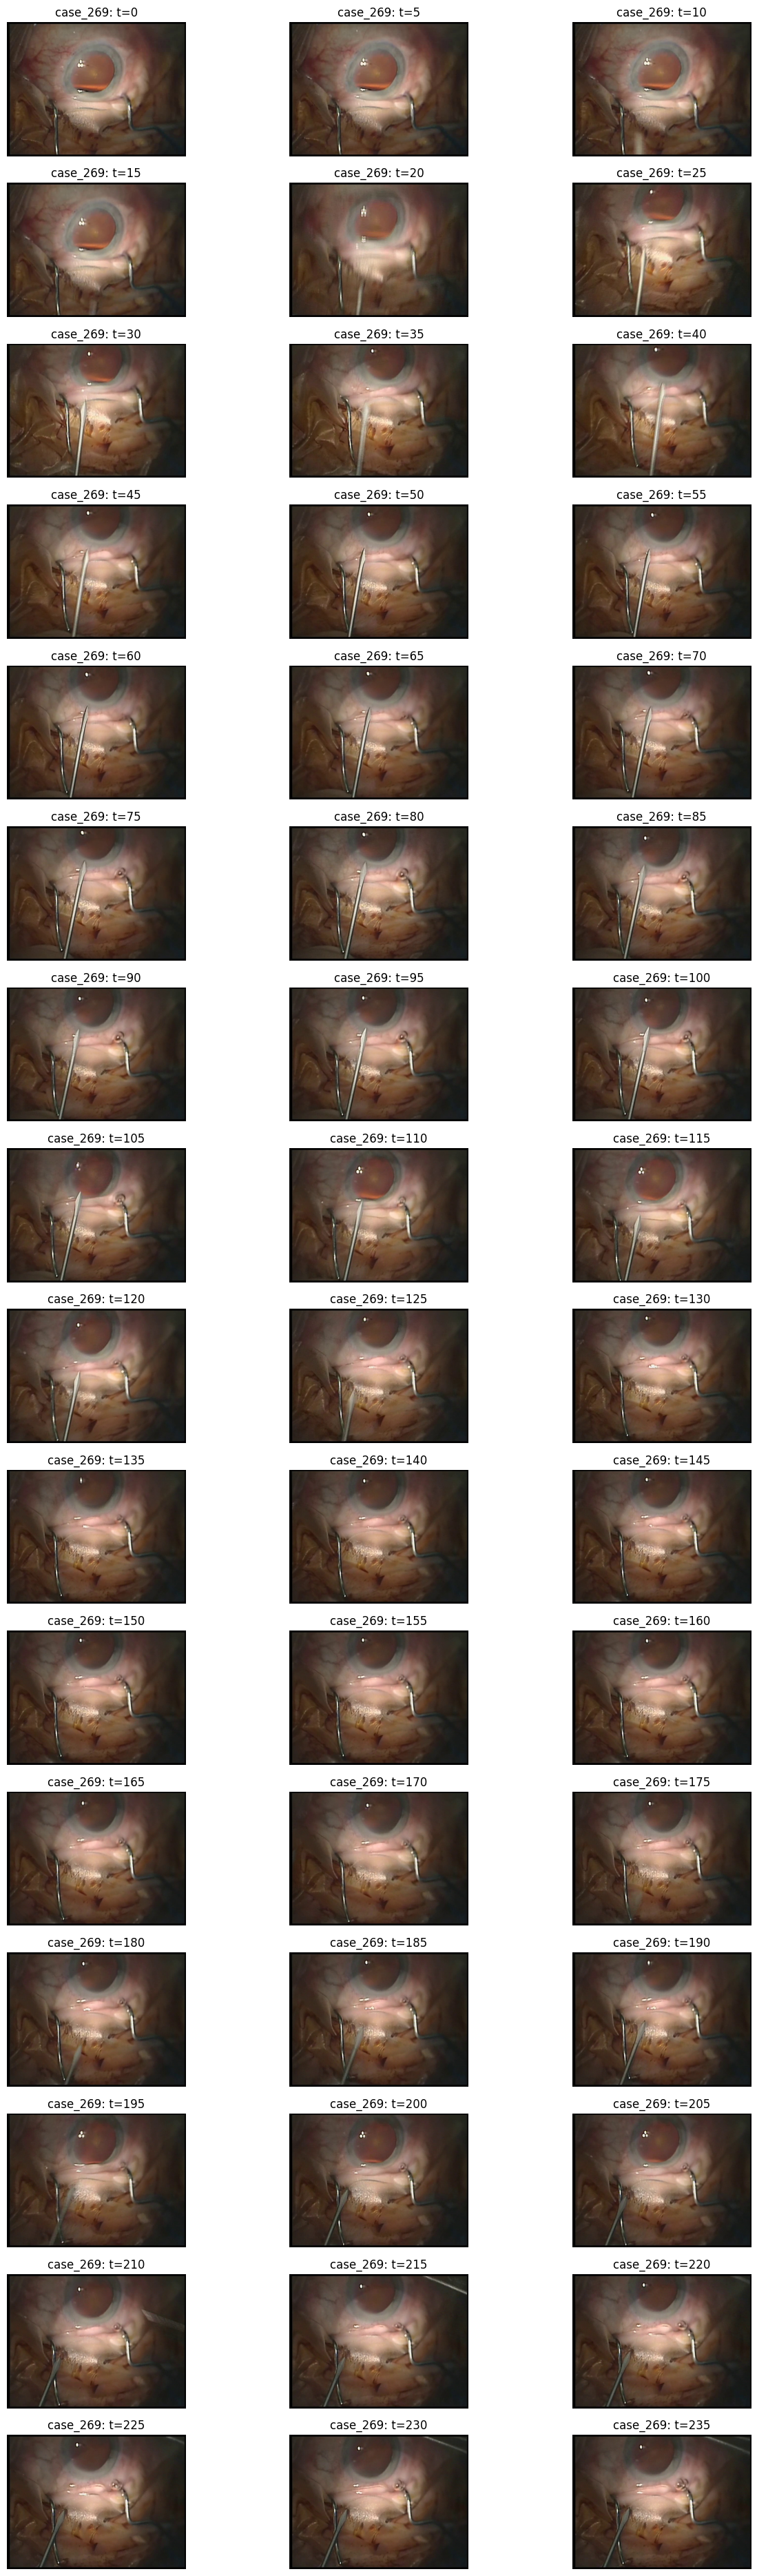

In [5]:
fig, ax = plt.subplots(N, T, figsize=(T*5, N*3))
for n in range(N):
    for t in range(T):
        ax[n, t].set_title(f'{case_ids[n]}: t={frame_nrs[t][n]}')
        ax[n, t].axis('off')
        ax[n, t].imshow(img_seq[n, t].permute(1, 2, 0))
plt.autoscale()